<a href="https://colab.research.google.com/github/dpanagop/2019-CS109A/blob/master/online_retail/Online_retail_Combine_Segmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentaion of online retail customers
## Part III - Combine Segmentations

## Introduction
In this notebook wecombine the two customer segmentations of online retail customers dataset ( [Online Retail II Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) from UC Irvine Machine Learning Repository)

Specifiacally, we combine
* Customer [segmentation by category](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_buying_category.ipynb) of bought items description and
* Customer [segmentation by RFM and country](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_RFM_Country.ipynb).

## Loading libraries and results of segmentations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
!wget github.com/dpanagop/data_analytics_examples/raw/master/online_retail/customer_segments_RFM_country.pickle
!wget github.com/dpanagop/data_analytics_examples/raw/master/online_retail/customer_segments_buying_categories.pickle

--2021-01-14 03:21:06--  http://github.com/dpanagop/data_analytics_examples/raw/master/online_retail/customer_segments_RFM_country.pickle
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/dpanagop/data_analytics_examples/raw/master/online_retail/customer_segments_RFM_country.pickle [following]
--2021-01-14 03:21:06--  https://github.com/dpanagop/data_analytics_examples/raw/master/online_retail/customer_segments_RFM_country.pickle
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dpanagop/data_analytics_examples/master/online_retail/customer_segments_RFM_country.pickle [following]
--2021-01-14 03:21:06--  https://raw.githubusercontent.com/dpanagop/data_analytics_examples/master/online_retail/customer_segments_RFM_coun

In [3]:
customer_spending_per_category=pd.read_pickle('customer_segments_buying_categories.pickle')
customer_spending_per_category.head()

category,Customer ID,0,1,2,3,cluster
0,12346.0,0.841716,0.000000,0.158284,0.000000,1
1,12347.0,0.853972,0.101290,0.004168,0.040569,1
2,12348.0,0.910270,0.000000,0.046648,0.043082,1
3,12349.0,0.924907,0.008446,0.002316,0.064331,1
4,12350.0,0.938995,0.061005,0.000000,0.000000,1


In [4]:
customer_RFM_GDP=pd.read_pickle('customer_segments_RFM_country.pickle')
customer_RFM_GDP.head()

,recency,frequency,monetary_value,weighted GDP,cluster
Customer ID,,,,,
12346.0,325,42.647059,-3.804706,2638296.0,0
12347.0,1,50.375000,704.165000,20805.0,5
12348.0,74,87.400000,403.880000,267856.0,5
12349.0,18,147.000000,880.908000,1848222.0,2
12350.0,309,309.000000,334.400000,366386.0,5


As said in [Part I](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_buying_category.ipynb), clustering based on categories spending resulted infour clusters with all of them having a high percentage of spending in category 0. In addition:
* cluster 0 has customers with high spending in category 2,
* cluster 1 has high spending only in category 0,
* cluster 2 has customers with high spending in category 3,
* cluster 3 has customers with high spending in category 1.



        Customer ID         0         1         2         3
              count    median    median    median    median
cluster                                                    
0               421  0.670152  0.007819  0.228504  0.043079
1              4287  0.892189  0.015741  0.001038  0.031568
2               807  0.672202  0.005246  0.017402  0.246114
3               427  0.534162  0.362365  0.000000  0.009505




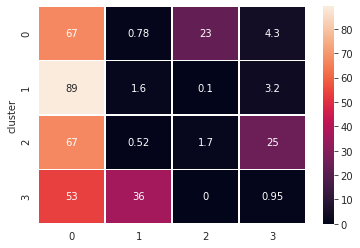

In [7]:
def cluster_profile(customer_spending_per_category):
  ''' profile clusters '''
  customer_clusters=customer_spending_per_category.groupby(['cluster']).agg({'Customer ID':['count'], 
                                                         0:'median',
                                                         1:'median',
                                                         2:'median',
                                                         3:'median'})
  print(customer_clusters)
  print('\n')
  customer_clusters=customer_clusters.drop([('Customer ID', 'count')],1)
  customer_clusters.columns=[0,1,2,3]
  
  customer_clusters[0]=100*customer_clusters[0]
  customer_clusters[1]=100*customer_clusters[1]
  customer_clusters[2]=100*customer_clusters[2]
  customer_clusters[3]=100*customer_clusters[3]
  

  sns.heatmap(customer_clusters, annot=True,  linewidths=.5)

cluster_profile(customer_spending_per_category)

In [5]:
customer_spending_per_category['cluster'].value_counts()

1    4287
2     807
3     427
0     421
Name: cluster, dtype: int64

As for RFM-Country clustering from [Part II](https://github.com/dpanagop/data_analytics_examples/blob/master/online_retail/Online_retail_Segmentation_by_RFM_Country.ipynb), we have four major clusters that can be ranked by RFM score (from best to to worst) as:

cluster 4 > cluster 0 > cluster 2/cluster 5

and that cluster 2 has customers from countries with greater GDP than cluster 5.
Thus, we will keep these four clusters plus one more into which we will merge the rest.

In [6]:
customer_RFM_GDP['cluster'].value_counts()

2    3549
0    1547
4     572
5     247
6      17
1       9
3       1
Name: cluster, dtype: int64

In [ ]:
customer_RFM_GDP['RFM_country_cluster']=5
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==0,'RFM_country_cluster']=0
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==1,'RFM_country_cluster']=1
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==4,'RFM_country_cluster']=2
customer_RFM_GDP.loc[customer_RFM_GDP['cluster']==6,'RFM_country_cluster']=3
customer_RFM_GDP['RFM_country_cluster'].value_counts()

0    3867
2    1275
1     506
3     269
5      25
Name: RFM_country_cluster, dtype: int64

In [ ]:
customer_RFM_GDP=customer_RFM_GDP.reset_index()
customer_RFM_GDP=customer_RFM_GDP[['Customer ID','RFM_country_cluster']]
print(customer_RFM_GDP.shape)
customer_spending_per_category=customer_spending_per_category[['Customer ID','item_category_cluster']]
print(customer_spending_per_category.shape)
customer_clusters=pd.merge(customer_RFM_GDP,customer_spending_per_category)
print(customer_clusters.shape)
customer_clusters.head()

(5942, 2)
(5942, 2)
(5942, 3)


,Customer ID,RFM_country_cluster,item_category_cluster
0,12346.0,0,1
1,12347.0,3,1
2,12348.0,3,1
3,12349.0,3,1
4,12350.0,3,1


In [ ]:
pd.crosstab(customer_clusters['RFM_country_cluster'],customer_clusters['item_category_cluster'])

item_category_cluster,0,1,3
RFM_country_cluster,,,
0,885,2953,29
1,0,506,0
2,26,1249,0
3,34,234,1
5,7,13,5


In [ ]:
pd.crosstab(customer_clusters['RFM_country_cluster'],customer_clusters['item_category_cluster'])/5942*100

item_category_cluster,0,1,3
RFM_country_cluster,,,
0,14.893975,49.697072,0.488051
1,0.000000,8.515651,0.000000
2,0.437563,21.019859,0.000000
3,0.572198,3.938068,0.016829
5,0.117805,0.218782,0.084147
